In [1]:
# Importing the required Libraries

import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline
import seaborn as sns

In [2]:
# Importing and Reading the data 
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 12 columns):
User_ID                       1029 non-null int64
Product_ID                    1029 non-null object
Gender                        1029 non-null object
Age                           1029 non-null object
Occupation                    1029 non-null int64
City_Category                 1029 non-null object
Stay_In_Current_City_Years    1029 non-null object
Marital_Status                1029 non-null int64
Product_Category_1            1029 non-null int64
Product_Category_2            720 non-null float64
Product_Category_3            330 non-null float64
Purchase                      1029 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 96.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 11 columns):
User_ID                       173 non-null int64
Product_ID                    173 non-null object
Gender                        173 non-null object
Age                           173 non-null object
Occupation                    173 non-null int64
City_Category                 173 non-null object
Stay_In_Current_City_Years    173 non-null object
Marital_Status                173 non-null int64
Product_Category_1            173 non-null int64
Product_Category_2            128 non-null float64
Product_Category_3            61 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 15.0+ KB


In [5]:
# print information about first five customers

train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


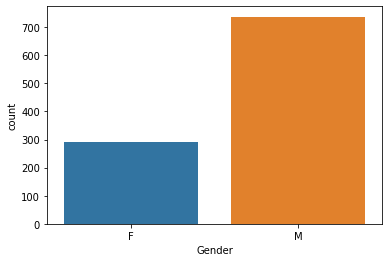

In [6]:
# seaborn library and the countplot function is used to plot the number of male and female customers

sns.countplot(train['Gender'])

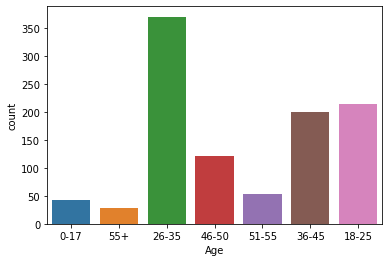

In [7]:
# seaborn library and the countplot function is used to plot the age group

sns.countplot(train['Age'])

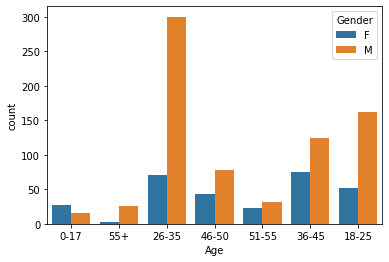

In [8]:
# Distribution of gender variable is analysed through age category with defined hue parameter.

sns.countplot(train['Age'], hue=train['Gender'])

Text(0.5, 1.0, 'Purchase amount Distribution')

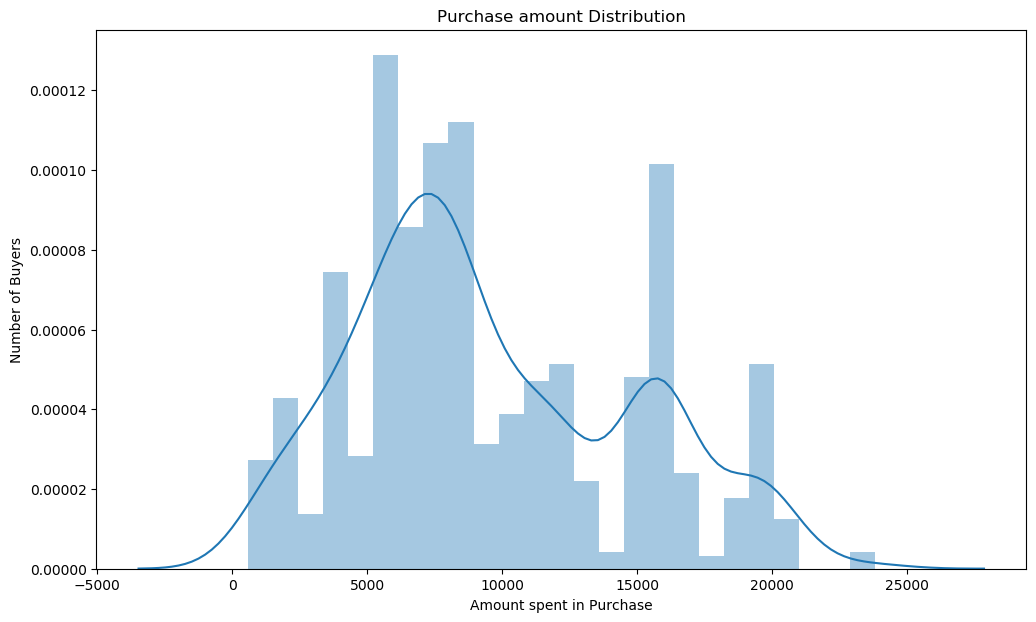

In [41]:
#  To get an idea of distribution of traget variable (purchase) a univariate analysis is done and plotted through histogram

plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.xlabel('Amount spent in Purchase')
plt.ylabel('Number of Buyers')
plt.title('Purchase amount Distribution')

In [11]:
# to analyze the categories in the data

train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.029000e+03,1029.000000,1029.000000,1029.000000,720.000000,330.000000,1029.000000
mean,1.000093e+06,8.176871,0.519922,4.910593,9.684722,12.790909,9621.198251
std,5.306651e+01,6.645836,0.499846,3.551699,5.045472,4.016899,5099.110979
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,584.000000
25%,1.000045e+06,3.000000,0.000000,1.000000,5.000000,9.000000,5936.000000
50%,1.000093e+06,7.000000,1.000000,5.000000,8.000000,14.000000,8140.000000
75%,1.000146e+06,15.000000,1.000000,8.000000,14.000000,16.000000,13551.000000
max,1.000174e+06,20.000000,1.000000,18.000000,17.000000,18.000000,23792.000000


In [12]:
# To get to know about the no.of customers (user Id) in the data

train['User_ID'].nunique()

162

In [13]:
# performing analyses on occupation category for each customer by taking unique values

def unique(column):
    x = np.array(column)
    print(np.unique(x))

In [14]:
print("The unique ID numbers of customers occupations:")
unique(train['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [15]:
# Money spent by each customer group through their occupation Id  

occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(train[train['Occupation'] == oid]['Purchase'].sum())

spent_money

[1017457,
 897012,
 333351,
 931029,
 1364411,
 25737,
 114729,
 956550,
 91788,
 292086,
 422499,
 216870,
 380525,
 100218,
 158652,
 185060,
 425891,
 1097831,
 58773,
 77103,
 752641]

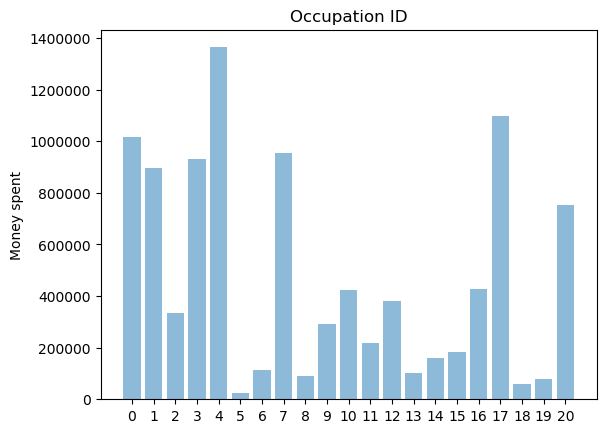

In [16]:
# Bivariate analysis and plotting the graph for the money spent per occupation category

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()

In [17]:
train['City_Category'].nunique()

3

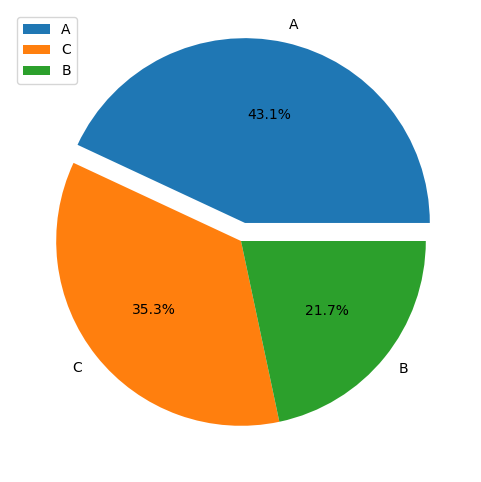

In [18]:
# Pie chart representation of the variable city_category which shows the ratio of customers from each city to spend on black friday

explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(11,6))
ax1.pie(train['City_Category'].value_counts(), explode=explode, labels=train['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

In [19]:
# Data Pre-processing 



train = train.drop(['Product_Category_3'], axis=1)

In [20]:
# missing values are filled for fitting the machine learning model.

train['Product_Category_2'].fillna((train['Product_Category_2'].mean()), inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 11 columns):
User_ID                       1029 non-null int64
Product_ID                    1029 non-null object
Gender                        1029 non-null object
Age                           1029 non-null object
Occupation                    1029 non-null int64
City_Category                 1029 non-null object
Stay_In_Current_City_Years    1029 non-null object
Marital_Status                1029 non-null int64
Product_Category_1            1029 non-null int64
Product_Category_2            1029 non-null float64
Purchase                      1029 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 88.6+ KB


In [22]:
# Data not required for prediction is dropped from the table 

train = train.drop(['User_ID','Product_ID'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 9 columns):
Gender                        1029 non-null object
Age                           1029 non-null object
Occupation                    1029 non-null int64
City_Category                 1029 non-null object
Stay_In_Current_City_Years    1029 non-null object
Marital_Status                1029 non-null int64
Product_Category_1            1029 non-null int64
Product_Category_2            1029 non-null float64
Purchase                      1029 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 72.5+ KB


In [23]:
# Conversion of categorical values to encoded vectors to process numeric values


df_Gender = pd.get_dummies(train['Gender'])
df_Age = pd.get_dummies(train['Age'])
df_City_Category = pd.get_dummies(train['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train['Stay_In_Current_City_Years'])

data_final = pd.concat([train, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.684722,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.000000,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.684722,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.000000,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.684722,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [24]:
# Prediction of Machine learning Algorithms

# Creating inpuut and output vectors for the model

X = data_final[['Occupation', 'Marital_Status', 'Product_Category_2', 'F', 'M', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', 'A', 'B', 'C', '0', '1', '2', '3', '4+']]
y = data_final['Purchase']

In [25]:
# divides the data into two sets , splits our dataset into 60% training set and 40% test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [26]:
# importing and fitting the model with data

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [27]:
# After training and learning procedure, intercept parameter and coefficient values of our model are printed.

print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 11220.533137334573
                    Coefficient
Occupation            34.156755
Marital_Status      -563.339012
Product_Category_2  -241.810681
F                   -202.722068
M                    202.722068
0-17                 782.744157
18-25               -826.500037
26-35                635.918302
36-45               1030.900432
46-50               1425.286094
51-55              -1354.191655
55+                -1694.157292
A                   -748.939467
B                    876.775180
C                   -127.835713
0                    -20.773976
1                    -45.716759
2                    510.208514
3                  -1046.784167
4+                   603.066389


In [28]:
# predictions of the purchases based on historical data by implementing linear regression model


predictions = lm.predict(X_test)
print("Preddiction of purchases (in dollars) for new costumers:", predictions)

Preddiction of purchases (in dollars) for new costumers: [ 9985.02364265  8432.50157632  6738.42277922  7079.72831616
  7058.05305246  7615.7520661   9809.09809453  8246.26047148
  8560.57424448  9044.38378234 12076.30799459 10531.80042019
 13026.42978209 10882.78516402 10251.51859308  7593.51969798
 10353.98885734  9569.12911836  7773.29903794 10658.90242047
  9238.65160668 10841.34884844  9959.60319475  8129.52770493
 10495.2478667   9544.76093093 11596.72428767  9830.81977156
 10965.07176601 11520.48675361  8650.72955677  9586.6448236
 10982.48949715  7657.71397998 11064.8690476   9278.60957057
  8077.10299606  7615.7520661  11142.52378193  8392.11102489
  9864.13821367 10101.15113688 11566.87495398 11650.11072708
  8189.28686358  9224.51102697 10452.52773607  8892.54023749
  9120.58325303  8636.99995495  9951.96567611  8866.74359002
  9066.61615046  7290.02558115 10841.4429118  12227.20490181
  8210.608161    9048.00405133 11187.43002567  9120.58325303
  7049.55699746 10517.7062180

In [29]:
# Evaluation metrics

from sklearn import metrics

print('The Mean absolute error(MAE) for linear regression model is :', metrics.mean_absolute_error(y_test, predictions))
print('The Mean squared error(MSE) for linear regression model is :', metrics.mean_squared_error(y_test, predictions))

The Mean absolute error(MAE) for linear regression model is : 3975.8958833343536
The Mean squared error(MSE) for linear regression model is : 24285289.92493797


In [30]:
# Importing the model 

from xgboost.sklearn import XGBRegressor

In [31]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)

In [32]:
# Fitting the model with the data

XGB_model=xgb.fit(X_train,y_train)

/Applications/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:18:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
# predictions of the purchases based on historical data by implementing XGBoost model

predictions=XGB_model.predict(X_test)
print("Prediction of purchases (in dollars) for new costumers:", predictions)

Prediction of purchases (in dollars) for new costumers: [ 8480.114   14517.813    6145.4673   7070.7812  14850.448    8340.994
  6945.489    4286.761    9755.903    6942.302   19254.807   10997.952
  9223.983    6785.889   17667.568    6651.266    5734.073   18646.031
  8658.858   13510.438    6321.9897   9240.249   18084.48     8336.76
 11997.226    4610.217    9036.168    7741.281   13707.524   10210.63
  8317.297    2782.5596  15887.588    5389.0503   9069.652    6546.9097
 14582.625    8340.994   10851.778   12081.745    8036.282   11118.859
  9918.921   13841.782   10927.709    8709.563   12305.972    5529.659
  4627.627    6037.7256   4971.6836   9294.087   14136.703    1167.247
  7101.8926  18738.24    13051.764    6283.302    4892.8364   4627.627
 14366.496   17331.059    6807.879    6037.7256   2880.941    4211.54
  9770.929   17880.914    8907.458    3170.1812  18646.031   10625.001
 10954.822   15333.603    9033.065   11461.359   11254.823    6562.423
  5826.502    1570.4481

In [35]:
# Evaluation metrics

from sklearn import metrics

print('The Mean absolute error(MAE) for XGBoost model is :', metrics.mean_absolute_error(y_test, predictions))
print('The Mean squared error(MSE) for XGBoost model is:', metrics.mean_squared_error(y_test, predictions))

The Mean absolute error(MAE) for XGBoost model is : 4504.37565107253
The Mean squared error(MSE) for XGBoost model is: 35522411.732060485
